<a href="https://colab.research.google.com/github/dzkha/DS-Unit-2-Regression-1/blob/master/DS_Sprint_Challenge_6_Regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science, Unit 2_
 
# Regression 1 Sprint Challenge

Your Sprint Challenge has two parts.

To demonstrate mastery on each part, do all the required, numbered instructions. 

To earn a score of "3" for the part, also do the stretch goals.

## Part 1. Predict avocado sales 🥑

For part 1 of your challenge, you'll use historical data on avocado sales across the nation!

Run this code cell to load the dataset. It has weekly sales volume (total number of avocados sold) from January 4, 2015 through March 25, 2018. The data comes directly from retailers' cash registers based on actual retail sales of Hass avocados in multiple US markets.

In [0]:
import pandas as pd
avocado_url = 'https://drive.google.com/uc?export=download&id=1ljE-LhCA9CCFvSIJYJ1ewX8JmdDpfuhi'
avocado = pd.read_csv(avocado_url,parse_dates=['Date'])
assert avocado.shape == (169, 2)

In [6]:
avocado.head()

,Date,Total Volume
0,2015-01-04,84674288
1,2015-01-11,78555753
2,2015-01-18,78388735
3,2015-01-25,76466226
4,2015-02-01,119453181


In [7]:
avocado.dtypes

Date            datetime64[ns]
Total Volume             int64
dtype: object

In [0]:
avocado = avocado.rename(columns={'Date': 'ds', 'Total Volume': 'y'})

In [9]:
from fbprophet import Prophet
m = Prophet()
m.fit(avocado)



INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
future = m.make_future_dataframe(periods=731)
future.tail()

,ds
895,2020-03-21
896,2020-03-22
897,2020-03-23
898,2020-03-24
899,2020-03-25


In [15]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
895,2020-03-21,1.074891e+08,1.035162e+08,1.292473e+08,1.055531e+08,1.095089e+08,8.209257e+06,8.209257e+06,8.209257e+06,8.209257e+06,8.209257e+06,8.209257e+06,0.0,0.0,0.0,1.156984e+08
896,2020-03-22,1.075012e+08,1.026258e+08,1.282599e+08,1.055623e+08,1.095269e+08,7.849158e+06,7.849158e+06,7.849158e+06,7.849158e+06,7.849158e+06,7.849158e+06,0.0,0.0,0.0,1.153503e+08
897,2020-03-23,1.075132e+08,1.026010e+08,1.284350e+08,1.055719e+08,1.095444e+08,7.370433e+06,7.370433e+06,7.370433e+06,7.370433e+06,7.370433e+06,7.370433e+06,0.0,0.0,0.0,1.148836e+08
898,2020-03-24,1.075252e+08,1.007441e+08,1.273802e+08,1.055818e+08,1.095598e+08,6.786255e+06,6.786255e+06,6.786255e+06,6.786255e+06,6.786255e+06,6.786255e+06,0.0,0.0,0.0,1.143115e+08
899,2020-03-25,1.075373e+08,1.006370e+08,1.259227e+08,1.055918e+08,1.095752e+08,6.112747e+06,6.112747e+06,6.112747e+06,6.112747e+06,6.112747e+06,6.112747e+06,0.0,0.0,0.0,1.136500e+08


Text(0.5, 1.0, 'Avocados')

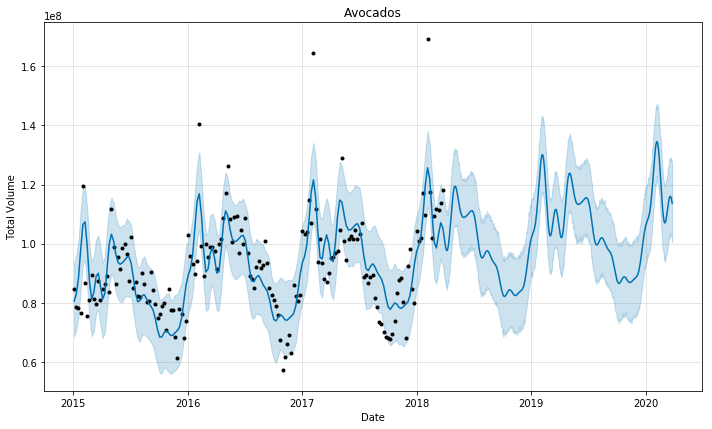

In [16]:
import matplotlib.pyplot as plt

fig1 = m.plot(forecast)
plt.xlabel("Date")
plt.ylabel("Total Volume")
plt.title("Avocados")

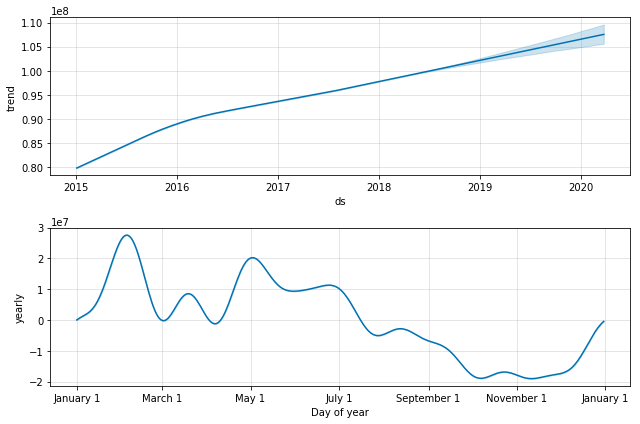

In [18]:
m.plot_components(forecast);

In [20]:
from fbprophet.diagnostics import cross_validation

df_cv = cross_validation(m,initial='730 days', 
                         horizon='90 days', period='45 days')



INFO:fbprophet:Making 8 forecasts with cutoffs between 2017-02-13 00:00:00 and 2017-12-25 00:00:00


Text(0.5, 1.0, 'Avocado Horizon vs. Error')

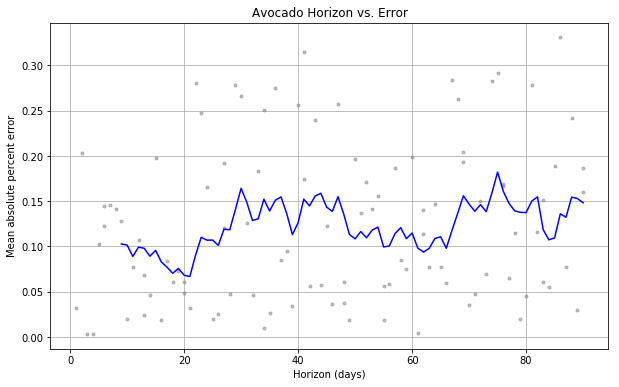

In [22]:
from fbprophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.ylabel('Mean absolute percent error')
plt.title('Avocado Horizon vs. Error')

### Required

#### Use the Prophet library to:
1. Fit a model and forecast avocado sales through March 25, 2020
2. Plot the forecast
3. Plot the forecast components
4. Do time series cross-validation, with these parameters: `horizon='90 days', period='45 days', initial='730 days'`
5. Plot the cross-validation Mean Absolute Percentage Error: `metric='mape'`

_For Part 1 of this Sprint Challenge, you are **not** required to calculate or plot baselines, or do train/test split._

You can be confident you've done it correctly when your plots look similar to these:

<img src="https://i.imgur.com/PoyVGp7.png" width="400" align="left">



### Stretch Goal
- Adjust your forecasts with Prophet's options for changepoints, holidays, and fourier order. Improve the cross-validation MAPE.

In [49]:
avocado.sort_values('y',ascending=False) 

#First week of Feb and May are the peaks

,ds,y
161,2018-02-04,169177780
109,2017-02-05,164404959
57,2016-02-07,140490152
122,2017-05-07,128924281
70,2016-05-08,126105026
4,2015-02-01,119453181
168,2018-03-25,118268903
162,2018-02-11,117577564
69,2016-05-01,117282850
159,2018-01-21,117087099


In [0]:
avocado.sort_values('y',ascending=False) 

In [0]:
holidays = pd.DataFrame({
  'holiday': 'Feb and May',
  'ds': pd.to_datetime(['2015-02-04','2015-05-04', '2016-02-04','2016-05-04','2017-02-04','2017-05-04',
                       '2018-02-04','2018-05-04','2019-02-04','2019-05-04','2020-02-04','2020-05-04',], utc=True),
  'lower_window': -3,
  'upper_window': 3,
})


In [104]:
m = Prophet(yearly_seasonality = 20,daily_seasonality=12,weekly_seasonality=20, changepoint_prior_scale=0.1,holidays=holidays,changepoint_range=0.7)
m.fit(avocado)

INFO:fbprophet:Making 8 forecasts with cutoffs between 2017-02-13 00:00:00 and 2017-12-25 00:00:00


Text(0.5, 1.0, 'Avocado Horizon vs. Error')

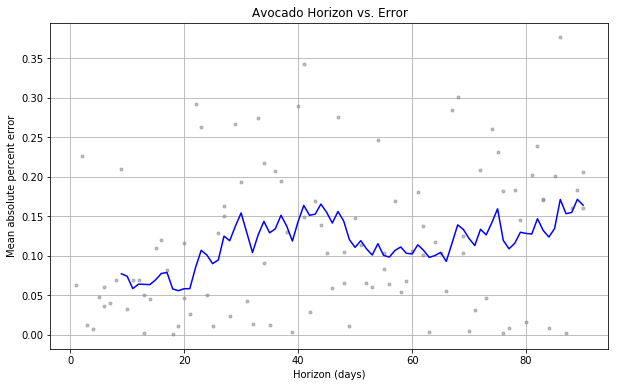

In [105]:
df_cv = cross_validation(m,initial='730 days', 
                         horizon='90 days', period='45 days')
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.ylabel('Mean absolute percent error')
plt.title('Avocado Horizon vs. Error')

#This is an improvement over the original


Text(0.5, 1.0, 'Avocados')

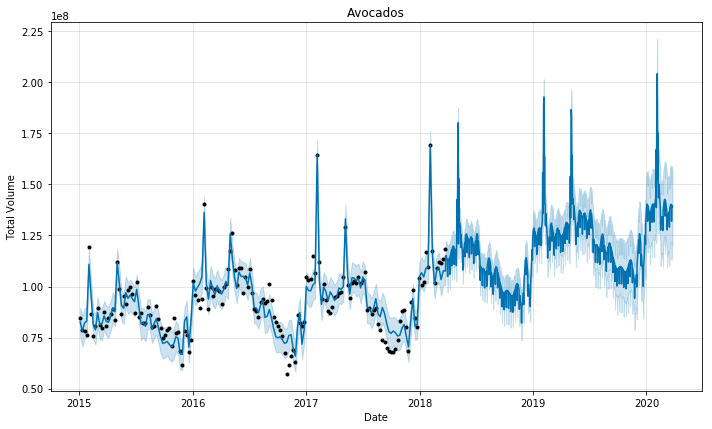

In [106]:
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.xlabel("Date")
plt.ylabel("Total Volume")
plt.title("Avocados")

## Part 2. Predict NYC apartment rent 🏠💸

For part 1 of your challenge, you'll use a real-world data with rent prices for a subset of apartments in New York City!

Run this code cell to load the dataset: 

In [0]:
import pandas as pd
rent_url = 'https://drive.google.com/uc?export=download&id=1lVVPmh-WYGb_0Gs_lOv22i02-150qDdZ'
rent = pd.read_csv(rent_url)
assert rent.shape == (48295, 7)

In [24]:
rent.head()

,year,month,bedrooms,bathrooms,latitude,longitude,price
0,2016,6,3,1.5,40.7145,-73.9425,3000
1,2016,6,2,1.0,40.7947,-73.9667,5465
2,2016,4,1,1.0,40.7388,-74.0018,2850
3,2016,4,1,1.0,40.7539,-73.9677,3275
4,2016,4,4,1.0,40.8241,-73.9493,3350


In [0]:
rent['price_mean'] = rent['price'].mean()

In [29]:
from sklearn.metrics import mean_absolute_error, r2_score

print(mean_absolute_error(rent['price'], rent['price_mean']))
print(r2_score(rent['price'], rent['price_mean']))

#R2 is 0 because it explains variance and is calculated by subtracting from the mean, while the individual values here are the mean

1055.7857771080928
0.0


In [32]:
rent.dtypes

year            int64
month           int64
bedrooms        int64
bathrooms     float64
latitude      float64
longitude     float64
price           int64
price_mean    float64
dtype: object

In [37]:
rent['month'].unique()

array([6, 4, 5])

In [0]:
train = rent[rent['month'] <= 5]
test = rent[rent['month'] == 6]

In [39]:
train.head()

,year,month,bedrooms,bathrooms,latitude,longitude,price,price_mean
2,2016,4,1,1.0,40.7388,-74.0018,2850,3438.052034
3,2016,4,1,1.0,40.7539,-73.9677,3275,3438.052034
4,2016,4,4,1.0,40.8241,-73.9493,3350,3438.052034
5,2016,4,4,2.0,40.7429,-74.0028,7995,3438.052034
6,2016,4,2,1.0,40.8012,-73.9660,3600,3438.052034


In [0]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [0]:
features = ['bedrooms', 
            'bathrooms']

target = 'price'

X = train[features]
y = train[target]



In [42]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
model.intercept_, model.coef_

(994.3062975058142, array([ 420.5097168 , 1531.76264753]))

In [44]:
test['pred'] = 994 + (420.5097168*test['bedrooms']) + (1531.76264753*test['bathrooms'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [45]:
print(mean_absolute_error(test['price'], test['pred']))
print(r2_score(test['price'], test['pred']))

754.0449611808318
0.4613538566495696


### Required
1. Begin with baselines for regression. Calculate the mean absolute error and $R^2$ score for a mean baseline. _(You can use the whole dataset, or a test set, either way is okay here!)_
2. Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
3. Choose any two features.
4. Use scikit-learn to fit a Linear Regression model on the train data.
5. Apply the model to predict rent prices for the test data.
6. Get regression metrics MAE and $R^2$ for the test data.
7. Get the model's coefficients and intercept.

### Stretch Goals
- Try at least 3 different feature combinations. (You don't have to use two features, you can choose any number of features.)
- Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.

In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
pd.options.mode.chained_assignment = None

def get_statistics(features,target,train_df,test_df):

  X = train_df[features]
  y = train_df[target]

  model.fit(X, y)
  
  test_df['pred'] = 0
  train_df['pred'] = 0

  for i in range(0,len(features)):
    test_df['pred'] += model.coef_[i]*test_df[features[i]]
    train_df['pred'] += model.coef_[i]*train_df[features[i]]


  test_df['pred'] = model.intercept_ + test_df['pred']
  train_df['pred'] = model.intercept_ + train_df['pred']

  print("Test MAE:",mean_absolute_error(test_df['price'], test_df['pred']))
  print("Test R2:",r2_score(test_df['price'], test_df['pred']))
  print("Test RMS:",mean_squared_error(test_df['price'], test_df['pred'])**.5)

  print("Train MAE:",mean_absolute_error(train_df['price'], train_df['pred']))
  print("Train R2:",r2_score(train_df['price'], train_df['pred']))
  print("Train RMS:",mean_squared_error(train_df['price'], train_df['pred'])**.5)

In [127]:
get_statistics(['bedrooms', 'longitude'],'price',train,test)

Test MAE: 767.873838790542
Test R2: 0.4094592610785772
Test RMS: 1080.3989448670127
Train MAE: 749.792126938925
Train R2: 0.4390089150261862
Train RMS: 1047.3389795942717


In [129]:
get_statistics(['bedrooms', 'bathrooms',
            'latitude','longitude'],'price',train,test)

Test MAE: 667.6543093383525
Test R2: 0.563794835971478
Test RMS: 928.548560697452
Train MAE: 651.30457312947
Train R2: 0.58606419144477
Train RMS: 899.6545615767902


In [130]:
get_statistics(['latitude', 
            'longitude'],'price',train,test)

Test MAE: 989.1376935671111
Test R2: 0.09856326192854614
Test RMS: 1334.832729130382
Train MAE: 993.6441630941673
Train R2: 0.10107742955983778
Train RMS: 1325.776845736822
